In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random
import numpy as np

#read s&p pricing data into notebook and do some reformatting
sp_prices = pd.read_csv("C:\\Users\\mmassaro\\Desktop\\SP500.csv")
sp_prices["Date"] = pd.to_datetime(sp_prices["Date"],format='%m/%d/%Y')
sp_prices = sp_prices.rename(index=str, columns={" Close": "close"})
sp_prices['close'] = sp_prices['close'].astype(float)
sp_prices['month'] = sp_prices['Date'].dt.month
sp_prices['day'] = sp_prices['Date'].dt.day

#enumerate periods
index_list = []
for idx, each in sp_prices.iterrows():
    index1 = int(idx) + 1
    index_list.append(index1)
sp_prices['period'] = index_list

In [12]:
#figure out period number for height of Dot-Com Bubble
sp_prices[sp_prices['Date'] == '2000-03-10']

,Date,Open,High,Low,close,month,day,period
1752,2000-03-10,1401.69,1413.46,1392.07,1395.07,3,10,1753


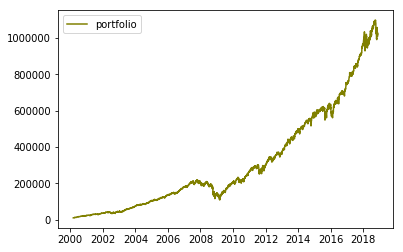

In [8]:
#set initial values
initial_investment = 10000.0
monthly_purchase = 2000


current_shares = 0.0
portfolio_value = []
#starting at the height of the dot-com bubble: sp_prices[sp_prices['Date'] == '2000-03-10'] gave us index value for start point
start_date = '2000-03-10'
start_point = 1753
current_value = 0.0
#we're going to track cashflow, assuming we completely cash out of this portfolio at the end of the model, to calculate a rate of return
cash_flow_this_period = 0
cash_flow_records = []
for idx, each in sp_prices.iterrows():
    price = each['close']
    date = each['Date']
    period = each['period']
    index = float(idx)
    month = each['month']
    day = each['day']
    # below, we are beginning our investment at the very height of the Dot-Com Bubble
    if period == start_point:
        #our starting number of shares
        current_shares = initial_investment/price
        start_date = date
        cash_flow_this_period = -initial_investment
    #below, dividends are paid out quarterly and then reinvested at the current market price
    if (month == 3) | (month == 6) | (month == 9) | (month == 12):
        if day == 1:
            dividend = current_value*.015
            dividend_reinvestment = dividend/price
            current_shares = current_shares + dividend_reinvestment
    #below, after we've begun investing, we make our monthly purchase of shares every thirty days
    if (index % 30 == 0) & (index != 0) & (period > start_point):
        new_purchase = monthly_purchase/price
        current_shares = current_shares + new_purchase
        cash_flow_this_period = -monthly_purchase
    #below, we calculate the current value of the portfolio for each period, appending it to a list so that we can see it change over time
    current_value = current_shares*price
    portfolio_value.append(current_value)
    #below, we cash out the total value of the portfolio
    if period == 6460:
        cash_flow_this_period = current_value
    cash_flow_records.append(cash_flow_this_period)

    cash_flow_this_period = 0
    
sp_prices['portfolio'] = portfolio_value
sp_prices['cash_flow'] = cash_flow_records
#we only want to look at the time period after our intial investment
portfolio_output = sp_prices[sp_prices['Date'] >= '2000-03-10']
portfolio_output.to_csv("PortfolioOutput1.csv")
plt.plot( 'Date', 'portfolio', data=portfolio_output, marker='', color='olive')
plt.legend()

In [34]:
# by November 2018, our portfolio is at over $1 million in value
portfolio_output.tail(20)

,Date,Open,High,Low,close,month,day,period,portfolio,cash_flow
6440,2018-10-23,2721.03,2753.59,2691.43,2740.69,10,23,6441,1.028678e+06,0.000000e+00
6441,2018-10-24,2737.87,2742.59,2651.89,2656.10,10,24,6442,9.969288e+05,0.000000e+00
6442,2018-10-25,2674.88,2722.70,2667.84,2705.57,10,25,6443,1.015497e+06,0.000000e+00
6443,2018-10-26,2667.86,2692.38,2628.16,2658.69,10,26,6444,9.979010e+05,0.000000e+00
6444,2018-10-29,2682.65,2706.85,2603.54,2641.25,10,29,6445,9.913551e+05,0.000000e+00
6445,2018-10-30,2640.68,2685.43,2635.34,2682.63,10,30,6446,1.006886e+06,0.000000e+00
6446,2018-10-31,2705.60,2736.69,2705.60,2711.74,10,31,6447,1.017813e+06,0.000000e+00
6447,2018-11-01,2717.58,2741.67,2708.85,2740.37,11,1,6448,1.028558e+06,0.000000e+00
6448,2018-11-02,2745.45,2756.55,2700.44,2723.06,11,2,6449,1.022061e+06,0.000000e+00
6449,2018-11-05,2726.37,2744.27,2717.94,2738.31,11,5,6450,1.027785e+06,0.000000e+00


In [9]:
#calculating rate of return from cash flow column
cash_flow_array = np.array(portfolio_output['cash_flow'])
daily_irr = np.irr(cash_flow_array)
yearly_irr = daily_irr*365
yearly_irr

0.14815197160746085

In [4]:
cash_flow_array

array([[ -10000.        ,       0.        ,       0.        , ...,
              0.        ,       0.        , 1011879.73232029]])